In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
bank =pd.read_csv('bank.csv',sep=';')

In [3]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [4]:
bank.shape


(4119, 21)

In [5]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
### Q. Read the bank dataset 

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [6]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


#### Input variables

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric) 

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

#### Predict variable (desired target):

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [6]:
### Data transformation
bank['education'].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".

In [7]:
bank['education']=np.where(bank['education'] =='basic.9y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.6y', 'Basic', bank['education'])
bank['education']=np.where(bank['education'] =='basic.4y', 'Basic', bank['education'])

After grouping, this is the columns

In [8]:
bank['education'].unique()

array(['Basic', 'high.school', 'university.degree', 'professional.course',
       'unknown', 'illiterate'], dtype=object)

### Data preparation

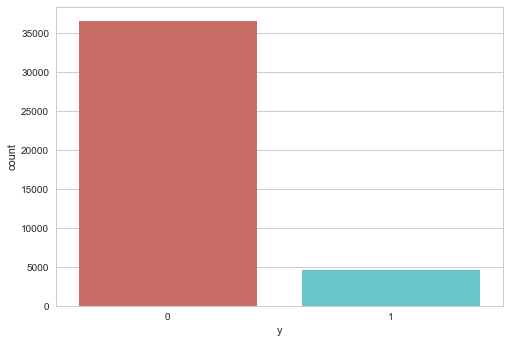

In [ ]:
### Q. Find out in the target column what is the respective count of values
### Q. Also plot the values of y in form of a bar graph

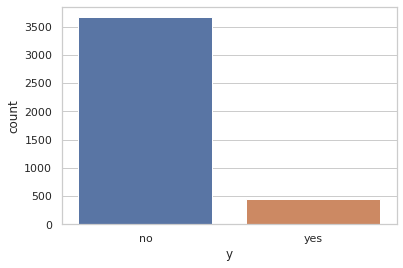

In [10]:
sns.countplot(x='y',data=bank)

In [11]:
bank.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668
yes,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451,451


There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

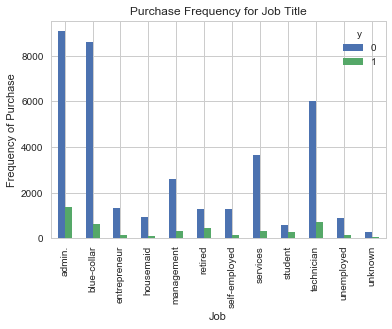

In [ ]:
## Create a visualization as shown below for variable 'job' and frequency of purchase

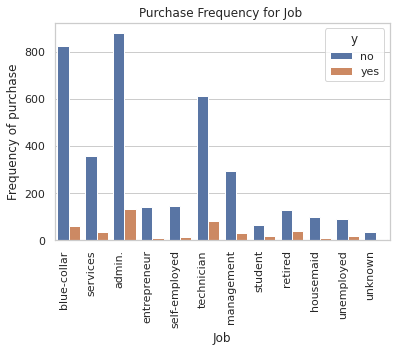

In [12]:
ax=sns.countplot(x='job',hue='y',data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Job', ylabel='Frequency of purchase', title='Purchase Frequency for Job ')
plt.grid()
plt.show()

The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

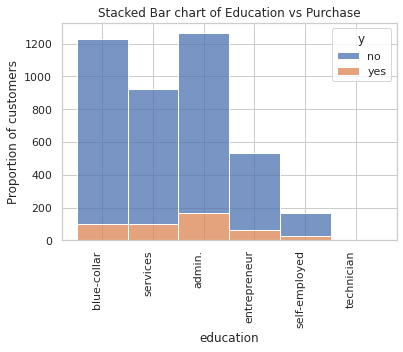

In [ ]:
### Create a stacked bar chart between variables 'Education','Purchase' and Proportion of Customers
sb =sns.histplot(bank,x='education',hue='y',multiple='stack')
sb.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
sb.set_title('Stacked Bar chart of Education vs Purchase')
sb.set_ylabel('Proportion of customers')
plt.show()


Education seems a good predictor of the outcome variable.

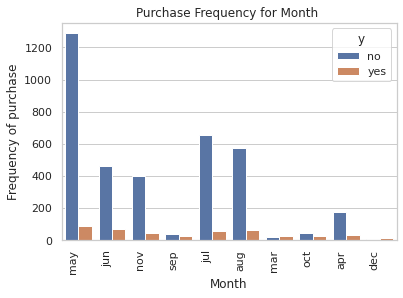

In [ ]:
## Q. Write code for the visualization as shown below
ax=sns.countplot(x='month',hue='y',data=bank)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.set(xlabel='Month', ylabel='Frequency of purchase', title='Purchase Frequency for Month ')
plt.show()

Month might be a good predictor of the outcome variable

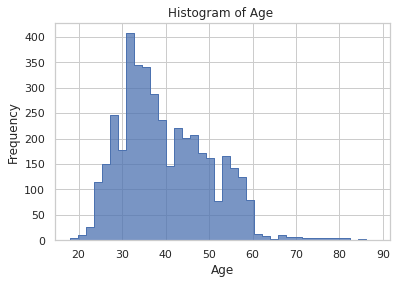

In [ ]:
## Q. Write code for the visualization as shown below
hi=sns.histplot(bank, x="age", element="step")
hi.set(xlabel='Age', ylabel='Frequency', title='Histogram of Age ')
plt.show()

The most of the customers of the bank in this dataset are in the age range of 30-40.

In [13]:
## Write code to convert following columns to equivalent dummy variables

cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']


In [9]:
bank =pd.get_dummies(bank,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],drop_first=True)
bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,no,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,53,1,999,0,1.4,93.918,-42.7,4.958,5228.1,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4115,39,219,1,999,0,1.4,93.918,-42.7,4.959,5228.1,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4116,27,64,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4117,58,528,1,999,0,1.4,93.444,-36.1,4.966,5228.1,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Feature Selection

In [ ]:
## Find the best posible features using feature engineering techniques. 

In [10]:
X = bank.drop("y",axis=1)
y = bank["y"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [13]:
lr = LogisticRegression()
_ = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9101941747572816

In [15]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=18)

_ = rfe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [16]:
X_train.loc[:, rfe.support_]

,previous,euribor3m,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,default_unknown,loan_unknown,contact_telephone,month_dec,month_jul,month_jun,month_mar,month_may,poutcome_nonexistent,poutcome_success
2675,0,4.960,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
1296,0,4.076,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
2400,0,4.864,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
3322,0,1.327,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1871,1,0.644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,1.268,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4079,0,4.191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
599,0,4.967,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
1361,0,1.405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


For example --

The Recursive Feature Elimination (RFE) has helped us select the following features: "previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", "poutcome_failure", "poutcome_nonexistent", "poutcome_success".

In [19]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_thu", "day_of_week_wed", 
      "poutcome_success", "poutcome_nonexistent", "poutcome_success"] 
X1=bank[cols]
y1=bank['y']

### Implementing the model

### Logistic Regression Model Fitting

In [ ]:
## Write code to implement Logistic Regression module by training the X,Y variables and perform prediction on the Test dataset.

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 101)

In [22]:
logm = LogisticRegression()
logm.fit(X1_train,y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_pred = logm.predict(X1_test)

### Confusion Matrix

In [ ]:
## Create and Analyze the confusion matrix

In [27]:
confusion_matrix(y1_test, y_pred)

array([[1085,   17],
       [ 111,   23]])

In [28]:
print(classification_report(y1_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      1102
         yes       0.57      0.17      0.26       134

    accuracy                           0.90      1236
   macro avg       0.74      0.58      0.60      1236
weighted avg       0.87      0.90      0.87      1236



### ROC/AUC

In [ ]:
## Check for ROC and Area under the curve.

In [29]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y1_test,y_pred)

ValueError: ignored

In [ ]:
## Calculate and analyze the Recall and precision

In [ ]:
#The Recall of the model is 90%

In [ ]:
#The precision of the model is 87%

### Accuracy

In [ ]:
## Find the accuracy of your model

In [ ]:
# the accuracy of the model is 87%

### Cross-validation

In [ ]:
## Allow 10-fold cross validation to run on all cores.

In [32]:

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)

model = LogisticRegression()

scores = cross_val_score(model, X1, y1, scoring='accuracy', cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.901 (0.009)


In [ ]:
# the accuracy has improved

### Model Tuning

In [ ]:
## Tune in different attributes of the model and get better accuracy

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

In [35]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X1_train, y1_train)
clf.score(X1_test, y1_test)

0.8932038834951457